#Data Understanding

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
# Path folder tempat menyimpan file
folder_path = "/content/drive/MyDrive/dataset (1)/hoax/Cleaned"

# Daftar file non-hoax
non_hoax_files = [
    "dataset_cnn_cleaned.xlsx",
    "dataset_detik_cleaned.xlsx",
    "dataset_kompas_cleaned.xlsx"
]

# List untuk menyimpan data non-hoax
non_hoax_data = []

for file_name in non_hoax_files:
    df = pd.read_excel(os.path.join(folder_path, file_name))
    df["label"] = 0  # label non-hoax
    df["sumber"] = file_name.replace("dataset_", "").replace("_cleaned.xlsx", "")
    non_hoax_data.append(df)

# Gabungkan semua data non-hoax
df_non_hoax = pd.concat(non_hoax_data, ignore_index=True)
print("Jumlah data non-hoax:", df_non_hoax.shape)
df_non_hoax.head()


Jumlah data non-hoax: (12648, 9)


,url,judul,tanggal,isi_berita,Narasi,Clean Narasi,hoax,label,sumber
0,https://www.cnnindonesia.com/nasional/20250420...,Pesan Paskah Uskup Agung Jakarta Kardinal Igna...,"Minggu, 20 Apr 2025 15:07 WIB",Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...,Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...,Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...,0,0,cnn
1,https://www.cnnindonesia.com/olahraga/20250420...,"Mike Tyson: Muhammad Ali Ganas seperti T-Rex, ...","Minggu, 20 Apr 2025 15:01 WIB","Mike Tysonmenyebut legenda tinju dunia,Muhamma...","Mike Tysonmenyebut legenda tinju dunia,Muhamma...","Mike Tysonmenyebut legenda tinju dunia,Muhamma...",0,0,cnn
2,https://www.cnnindonesia.com/ekonomi/202504171...,Kulkas SBS Banting Harga Gila-gilaan di Transm...,"Minggu, 20 Apr 2025 15:00 WIB",Pesta diskon bertajukTransmart Full Day Saleke...,Pesta diskon bertajukTransmart Full Day Saleke...,Pesta diskon bertajukTransmart Full Day Saleke...,0,0,cnn
3,https://www.cnnindonesia.com/nasional/20250420...,Hakim Djuyamto Diduga Titip Rp704 Juta ke Satp...,"Minggu, 20 Apr 2025 14:44 WIB",Kejaksaan Agung (Kejagung) menyebut jumlah uan...,Kejaksaan Agung (Kejagung) menyebut jumlah uan...,Kejaksaan Agung (Kejagung) menyebut jumlah uan...,0,0,cnn
4,https://www.cnnindonesia.com/olahraga/20250420...,Leicester vs Liverpool: Menanti Gol Kaki Kiri ...,"Minggu, 20 Apr 2025 14:33 WIB",Mohamed Salahberpeluang menciptakan rekor unik...,Mohamed Salahberpeluang menciptakan rekor unik...,Mohamed Salahberpeluang menciptakan rekor unik...,0,0,cnn


In [34]:
df_hoax = pd.read_excel(os.path.join(folder_path, "dataset_turnbackhoax_cleaned.xlsx"))
df_hoax["label"] = 1  # label hoax
df_hoax["sumber"] = "turnbackhoax"

print("Jumlah data hoax:", df_hoax.shape)
df_hoax.head()


Jumlah data hoax: (12648, 9)


,url,judul,tanggal,isi_berita,Narasi,Clean Narasi,hoax,label,sumber
0,https://turnbackhoax.id/2025/04/19/penipuan-ta...,[PENIPUAN] Tautan “New Gebyar Program Bank BCA...,"April 19, 2025",Akun Facebook “Gebyar BCA 2025” pada Rabu (26/...,New Gebyar Program Bank BCA di TAHUN 2025 Berl...,New Gebyar Program Bank BCA di TAHUN 2025 Berl...,1,1,turnbackhoax
1,https://turnbackhoax.id/2025/04/18/salah-video...,"[SALAH] Video “Ada Bangkai Kereta di Tebing, A...","April 18, 2025",Akun Facebook “Agus Jajang Nurjaman” pada Rabu...,“Bangkai gerbong kereta bekas kecelakaan mangk...,Bangkai gerbong kereta bekas kecelakaan mangkr...,1,1,turnbackhoax
2,https://turnbackhoax.id/2025/04/17/salah-jokow...,"[SALAH] Jokowi Pakai Rp38,5 Triliun Dana Haji ...","April 17, 2025",Pada Sabtu (5/4/2025) beredarunggahandi Facebo...,“Semoga bisa di usut tuntas #konoha” Per arsip...,Semoga bisa di usut tuntas #konoha Per arsip d...,1,1,turnbackhoax
3,https://turnbackhoax.id/2025/04/17/penipuan-pe...,[PENIPUAN] Pencairan Dana Bansos Kemenkeu,"April 17, 2025",Akun Facebook “bansos bantuan masyarakat” pada...,“INFO BANSOS…!!! Alhamdulillah pencairan Dana ...,INFO BANSOS !!! Alhamdulillah pencairan Dana B...,1,1,turnbackhoax
4,https://turnbackhoax.id/2025/04/17/penipuan-ta...,[PENIPUAN] Tautan “Bantuan Subsidi Upah”,"April 17, 2025",Akun Facebook “Novita Lestariarta” pada Kamis ...,“AYO IBU IBU SEGERA DAFTAR KAN DIRI ANDA DI CE...,AYO IBU IBU SEGERA DAFTAR KAN DIRI ANDA DI CEK...,1,1,turnbackhoax


In [35]:
# Gabungkan hoax dan non-hoax
df_all = pd.concat([df_non_hoax, df_hoax], ignore_index=True)

# Reset index dan tampilkan info
df_all = df_all.reset_index(drop=True)
print("Total data gabungan:", df_all.shape)
df_all.head()


Total data gabungan: (25296, 9)


,url,judul,tanggal,isi_berita,Narasi,Clean Narasi,hoax,label,sumber
0,https://www.cnnindonesia.com/nasional/20250420...,Pesan Paskah Uskup Agung Jakarta Kardinal Igna...,"Minggu, 20 Apr 2025 15:07 WIB",Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...,Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...,Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...,0,0,cnn
1,https://www.cnnindonesia.com/olahraga/20250420...,"Mike Tyson: Muhammad Ali Ganas seperti T-Rex, ...","Minggu, 20 Apr 2025 15:01 WIB","Mike Tysonmenyebut legenda tinju dunia,Muhamma...","Mike Tysonmenyebut legenda tinju dunia,Muhamma...","Mike Tysonmenyebut legenda tinju dunia,Muhamma...",0,0,cnn
2,https://www.cnnindonesia.com/ekonomi/202504171...,Kulkas SBS Banting Harga Gila-gilaan di Transm...,"Minggu, 20 Apr 2025 15:00 WIB",Pesta diskon bertajukTransmart Full Day Saleke...,Pesta diskon bertajukTransmart Full Day Saleke...,Pesta diskon bertajukTransmart Full Day Saleke...,0,0,cnn
3,https://www.cnnindonesia.com/nasional/20250420...,Hakim Djuyamto Diduga Titip Rp704 Juta ke Satp...,"Minggu, 20 Apr 2025 14:44 WIB",Kejaksaan Agung (Kejagung) menyebut jumlah uan...,Kejaksaan Agung (Kejagung) menyebut jumlah uan...,Kejaksaan Agung (Kejagung) menyebut jumlah uan...,0,0,cnn
4,https://www.cnnindonesia.com/olahraga/20250420...,Leicester vs Liverpool: Menanti Gol Kaki Kiri ...,"Minggu, 20 Apr 2025 14:33 WIB",Mohamed Salahberpeluang menciptakan rekor unik...,Mohamed Salahberpeluang menciptakan rekor unik...,Mohamed Salahberpeluang menciptakan rekor unik...,0,0,cnn


In [36]:
# Cek jumlah baris dan kolom
print("Shape (rows, columns):", df_all.shape)

# Tipe data dan non-null count
df_all.info()


Shape (rows, columns): (25296, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25296 entries, 0 to 25295
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           25296 non-null  object
 1   judul         25296 non-null  object
 2   tanggal       25296 non-null  object
 3   isi_berita    25292 non-null  object
 4   Narasi        24671 non-null  object
 5   Clean Narasi  24675 non-null  object
 6   hoax          25296 non-null  int64 
 7   label         25296 non-null  int64 
 8   sumber        25296 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.7+ MB


In [37]:
df_all.nunique()

,0
url,25296
judul,25238
tanggal,13019
isi_berita,25290
Narasi,24615
Clean Narasi,24598
hoax,2
label,2
sumber,4


In [38]:
print("Missing values per column:")
print(df_all.isnull().sum())


Missing values per column:
url               0
judul             0
tanggal           0
isi_berita        4
Narasi          625
Clean Narasi    621
hoax              0
label             0
sumber            0
dtype: int64


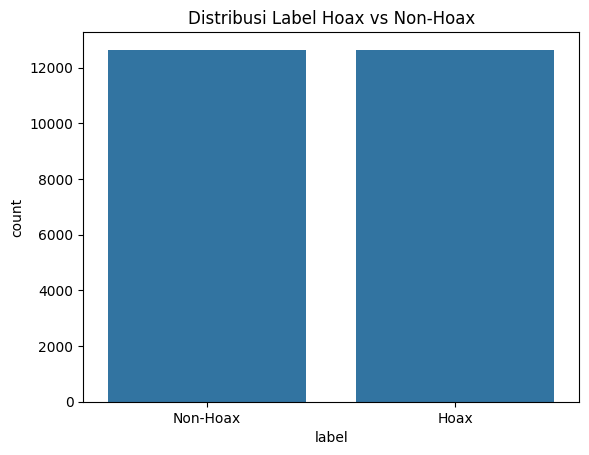

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df_all)
plt.title("Distribusi Label Hoax vs Non-Hoax")
plt.xticks([0, 1], ["Non-Hoax", "Hoax"])
plt.show()


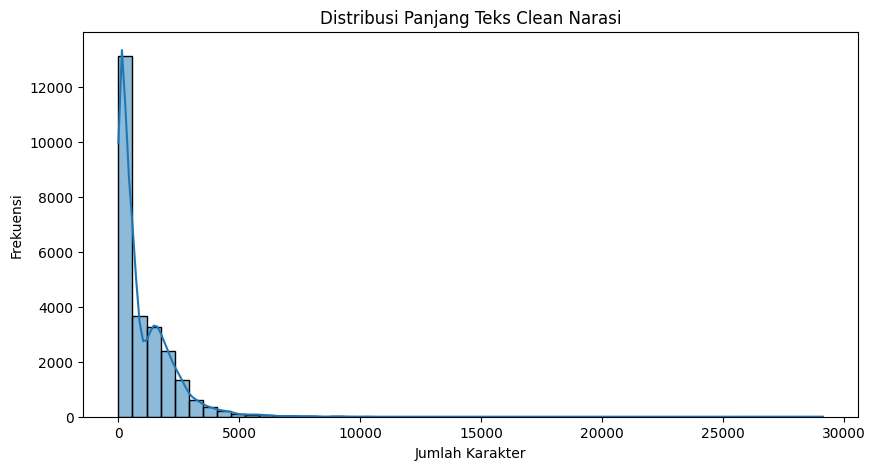

In [40]:
# Hitung panjang karakter dari Clean Narasi
df_all["panjang_clean"] = df_all["Clean Narasi"].astype(str).apply(len)

# Histogram distribusi panjang
plt.figure(figsize=(10,5))
sns.histplot(df_all["panjang_clean"], bins=50, kde=True)
plt.title("Distribusi Panjang Teks Clean Narasi")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()


In [41]:
df_all[df_all["Clean Narasi"].isnull() | (df_all["Clean Narasi"].astype(str).str.strip() == "")]


,url,judul,tanggal,isi_berita,Narasi,Clean Narasi,hoax,label,sumber,panjang_clean
4409,https://news.detik.com/kolom/d-7874698/pengala...,Pengalaman Cek Kesehatan Gratis Hadiah Ultah P...,"Sabtu, 19 Apr 2025 11:05 WIB",[Gambas:Video 20detik],NaN,NaN,0,0,detik,3
5168,https://news.detik.com/kolom/d-7868362/membaca...,Membaca Pertemuan Prabowo-Megawati Jelang Kong...,"Selasa, 15 Apr 2025 10:48 WIB",[Gambas:Video 20detik],NaN,NaN,0,0,detik,3
13559,https://turnbackhoax.id/2024/10/02/penipuan-lo...,[PENIPUAN] Lowongan Perawat RSUD Jombang Tahun...,"October 2, 2024",Hasil periksa fakta Arief Putra Ramadhan. RSUD...,NaN,NaN,1,1,turnbackhoax,3
13759,https://turnbackhoax.id/2024/09/24/penipuan-to...,"[PENIPUAN] Tommy Winata, Pemilik PT Artha Grah...","September 24, 2024",Hasil periksa fakta Arief Putra Ramadhan. Vide...,NaN,NaN,1,1,turnbackhoax,3
13910,https://turnbackhoax.id/2024/09/10/salah-pm-si...,"[SALAH] PM Singapura Sebut: Negara Gila Agama,...","September 10, 2024",Artikel hasil periksa fakta Vinanda (Relawan M...,NaN,NaN,1,1,turnbackhoax,3
...,...,...,...,...,...,...,...,...,...,...
25248,https://turnbackhoax.id/2020/01/09/false-dange...,[FALSE] “dangerous Snack made in Israel”,"January 9, 2020","Recycled disinformation, product of Turkey NOT...",NaN,NaN,1,1,turnbackhoax,3
25254,https://turnbackhoax.id/2020/01/08/false-dog-s...,[FALSE] “dog saved infant koala in the fires”,"January 8, 2020","From freezing, NOT from the fire. Happened in ...",NaN,NaN,1,1,turnbackhoax,3
25263,https://turnbackhoax.id/2020/01/07/clarificati...,[CLARIFICATION] Photos of “Sam the Koala” and ...,"January 7, 2020",Both image are related to Australia’s 2009 “Bl...,NaN,NaN,1,1,turnbackhoax,3
25278,https://turnbackhoax.id/2020/01/03/salah-judul...,[SALAH] Judul berita Tempo “MUI minta agar jan...,"January 3, 2020",Gambar suntingan.Tempo.cotidak pernah memuat b...,NaN,NaN,1,1,turnbackhoax,3


#Data Preparation

In [44]:
# Hapus data kosong atau kosong string di Clean Narasi
df_model = df_all[["Clean Narasi", "label"]].dropna()
df_model = df_model[df_model["Clean Narasi"].str.strip() != ""]
df_model = df_model.reset_index(drop=True)

print("Data setelah dibersihkan:", df_model.shape)


Data setelah dibersihkan: (24675, 2)


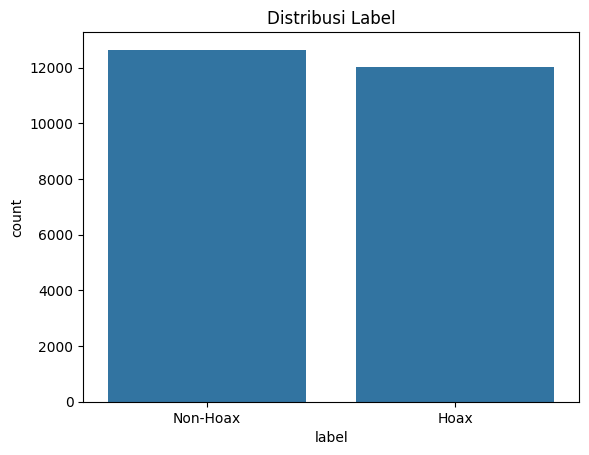

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df_model)
plt.xticks([0,1], ["Non-Hoax", "Hoax"])
plt.title("Distribusi Label")
plt.show()


In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_model["Clean Narasi"])

# Konversi ke sequence dan padding
sequences = tokenizer.texts_to_sequences(df_model["Clean Narasi"])
maxlen = 200
X = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
y = df_model["label"].values

print("Contoh padding:\n", X[0][:20])


Contoh padding:
 [4672  468   20 6193 7371 9012 3828    1    1  483    6  408 3715    4
  389  475   74    2 3971    4]


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (19740, 200)
Test shape : (4935, 200)


# Modeling and Result

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dropout, Dense

# Parameter
vocab_size = 10000
embedding_dim = 64
input_length = X_train.shape[1]

# Arsitektur model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    GlobalAveragePooling1D(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Bangun model secara eksplisit (agar summary tampil lengkap)
model.build(input_shape=(None, input_length))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,113 (2.45 MB)

 Trainable params: 642,113 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8274 - loss: 0.3842 - val_accuracy: 0.9810 - val_loss: 0.0902
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9792 - loss: 0.0671 - val_accuracy: 0.9882 - val_loss: 0.0560
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9906 - loss: 0.0343 - val_accuracy: 0.9882 - val_loss: 0.0609
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9923 - loss: 0.0253 - val_accuracy: 0.9895 - val_loss: 0.0392
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9952 - loss: 0.0217 - val_accuracy: 0.9909 - val_loss: 0.0376
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9960 - loss: 0.0149 - val_accuracy: 0.9913 - val_loss: 0.0402
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9982 - loss: 0.0100 - val_accuracy: 0.9901 - val_loss: 0.0438
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9965 - loss: 0.0121 - val

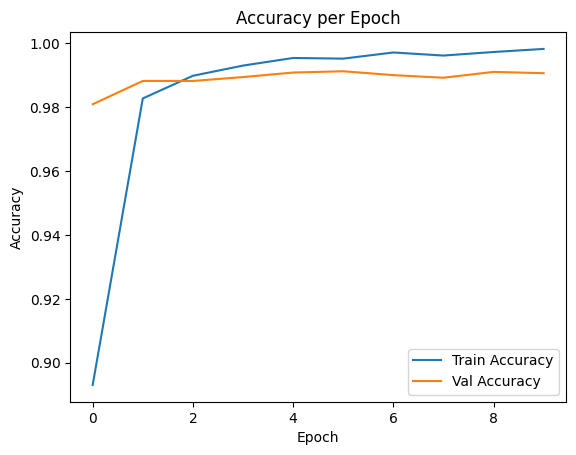

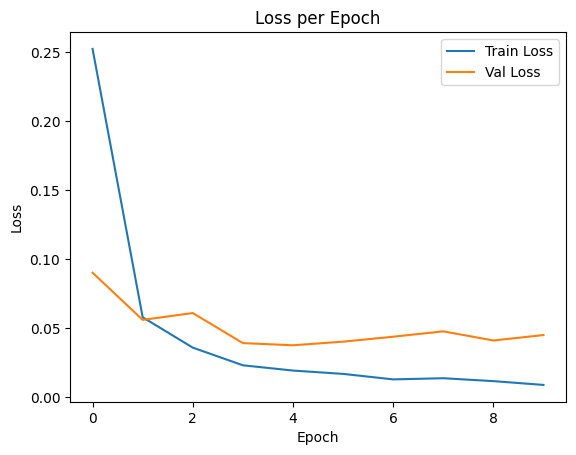

In [50]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [51]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0409
Test Accuracy: 0.9907


Evaluation

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


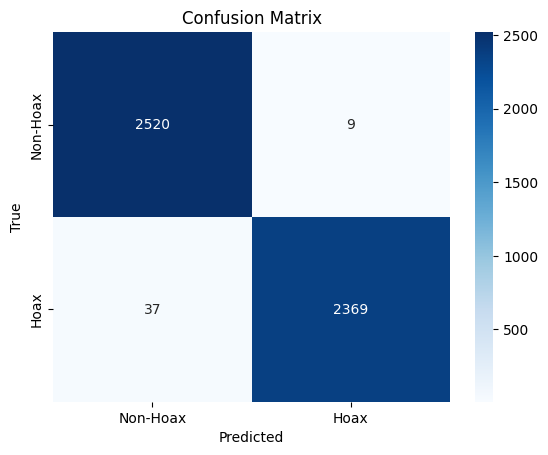

              precision    recall  f1-score   support

    Non-Hoax       0.99      1.00      0.99      2529
        Hoax       1.00      0.98      0.99      2406

    accuracy                           0.99      4935
   macro avg       0.99      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Prediksi
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Hoax", "Hoax"], yticklabels=["Non-Hoax", "Hoax"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=["Non-Hoax", "Hoax"]))


In [53]:
def prediksi_berita(narasi_baru):
    # Preprocessing: ubah ke bentuk list agar bisa diproses tokenizer
    narasi_seq = tokenizer.texts_to_sequences([narasi_baru])
    narasi_pad = pad_sequences(narasi_seq, maxlen=maxlen, padding='post', truncating='post')

    # Prediksi
    prob = model.predict(narasi_pad)[0][0]
    label = 1 if prob >= 0.5 else 0
    status = "HOAX" if label == 1 else "BUKAN HOAX"

    print(f"Prediksi: {status}")
    print(f"Probabilitas Hoax: {prob:.4f}")


In [58]:
berita_uji = """
ijazah jokowi adalah ijazah palsu
"""

prediksi_berita(berita_uji)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Prediksi: HOAX
Probabilitas Hoax: 0.9985


In [59]:
model.save("model_hoax.h5")


In [60]:
from tensorflow.keras.models import load_model

# Load model dari file h5
model = load_model("model_hoax.h5")
def prediksi_berita(narasi_baru):
    # Preprocessing sama seperti sebelumnya
    narasi_seq = tokenizer.texts_to_sequences([narasi_baru])
    narasi_pad = pad_sequences(narasi_seq, maxlen=200, padding='post', truncating='post')

    # Prediksi
    prob = model.predict(narasi_pad)[0][0]
    label = 1 if prob >= 0.5 else 0
    status = "HOAX" if label == 1 else "BUKAN HOAX"

    print(f"Narasi: {narasi_baru.strip()[:100]}...")
    print(f"Prediksi: {status}")
    print(f"Probabilitas Hoax: {prob:.4f}")


In [63]:
contoh_narasi = """
vaksin covid 19 mengandung racun berbahaya.
"""

prediksi_berita(contoh_narasi)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Narasi: vaksin covid 19 mengandung racun berbahaya....
Prediksi: HOAX
Probabilitas Hoax: 0.9999
